In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [2]:
data = pd.read_csv("C:\\Users\\channu\\Downloads\\bank-full.csv",sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [6]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
No = len(data[data.y=='no'])
Yes = len(data[data.y=='yes'])
Yes_Percent = (Yes/len(data['y']))*100
No_Percent = (No/len(data['y']))*100
print('Percent of Yes: ' + str(Yes_Percent))
print('Percent of No:  ' + str(No_Percent))

Percent of Yes: 11.698480458295547
Percent of No:  88.30151954170445


In [9]:
Subscribe = data[data['y']=='yes']

Not_Subscribe = data[data['y']=='no']

In [10]:
print(Subscribe.shape,Not_Subscribe.shape)

(5289, 17) (39922, 17)


<AxesSubplot:xlabel='age', ylabel='count'>

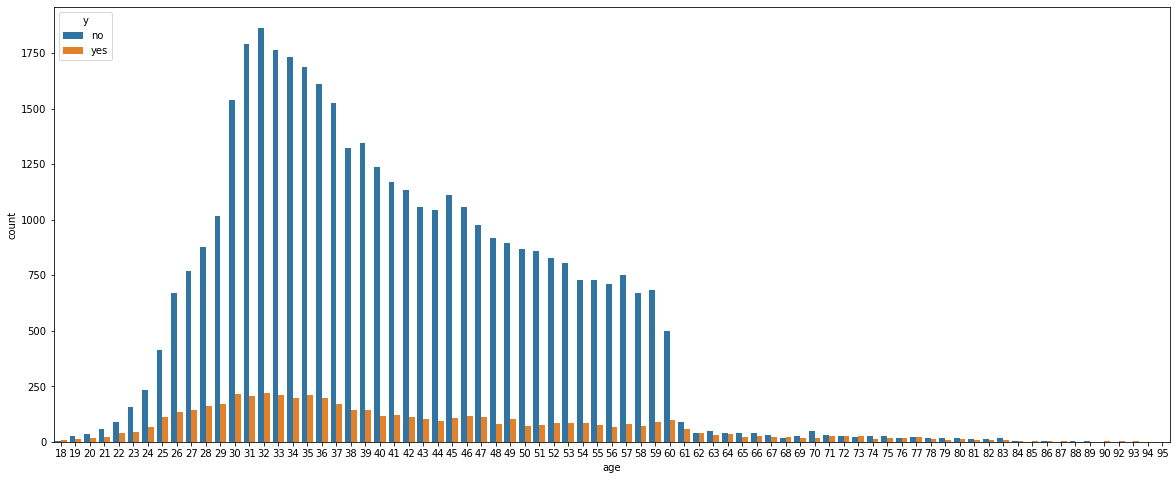

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(x="age",data=data,hue="y")

<AxesSubplot:xlabel='job', ylabel='count'>

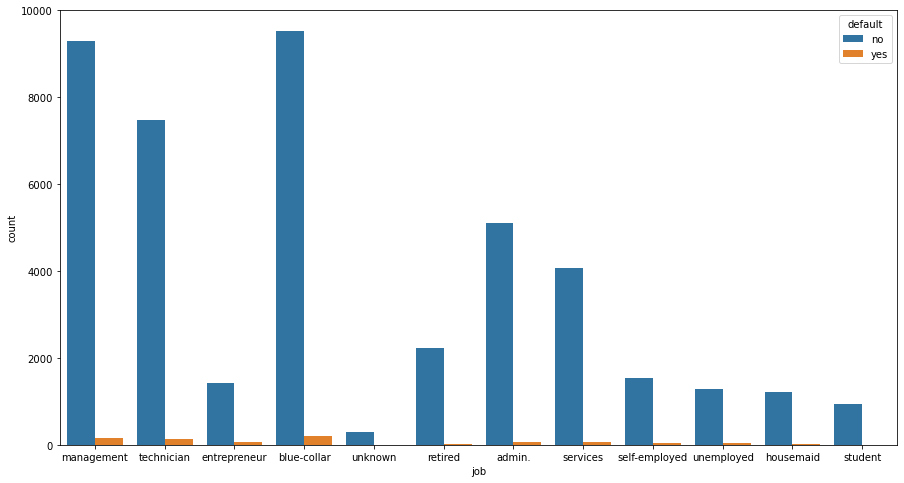

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x="job",data=data,hue="default")

<AxesSubplot:xlabel='job', ylabel='count'>

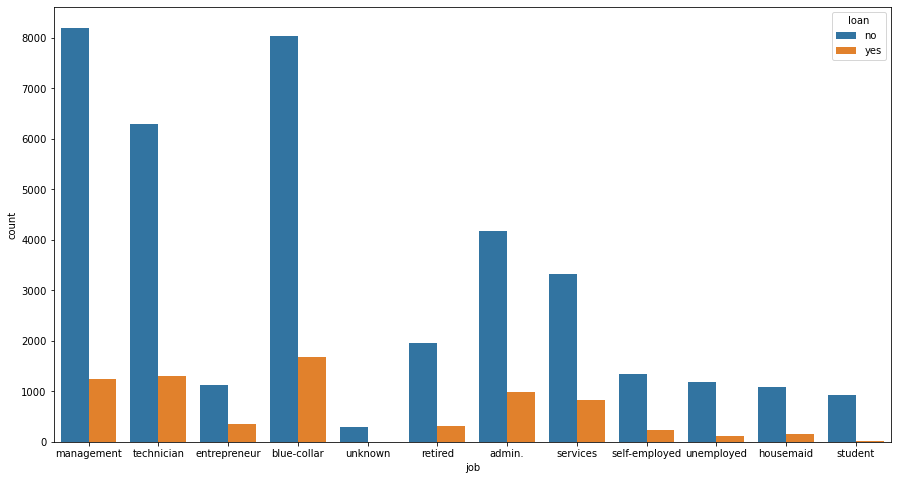

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x="job",data=data,hue="loan")

<AxesSubplot:xlabel='job', ylabel='count'>

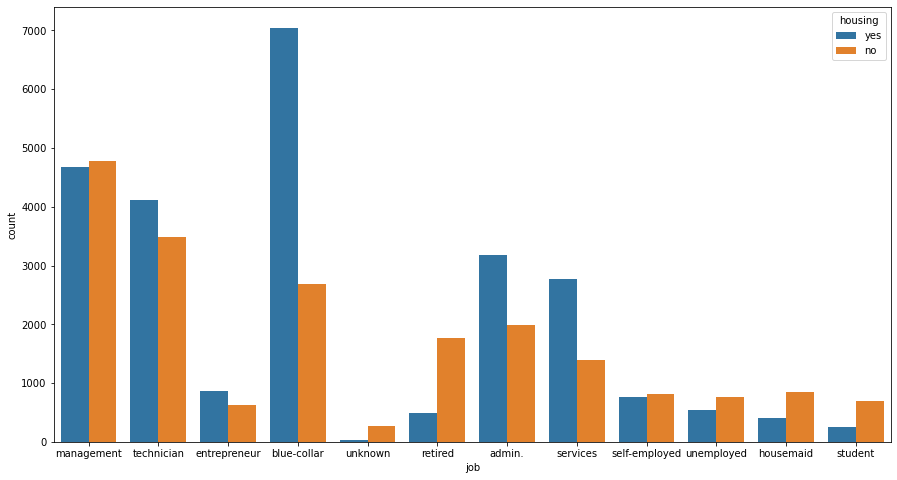

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x="job",data=data,hue="housing")

<AxesSubplot:xlabel='job', ylabel='count'>

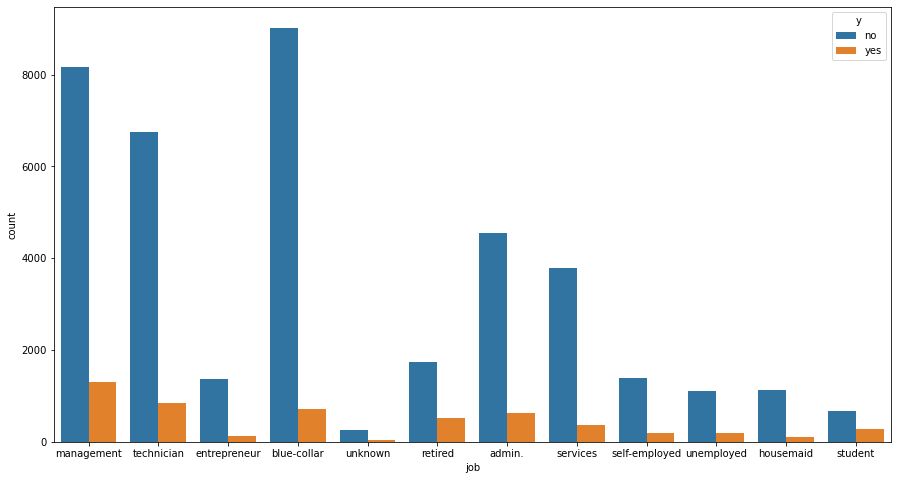

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x="job",data=data,hue="y")

<AxesSubplot:xlabel='marital', ylabel='count'>

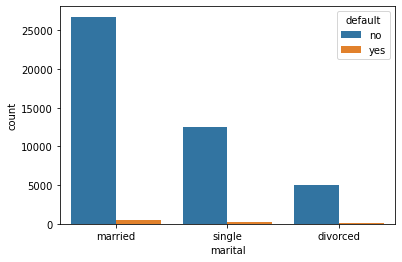

In [16]:
sns.countplot(x="marital",data=data,hue="default")

<AxesSubplot:xlabel='marital', ylabel='count'>

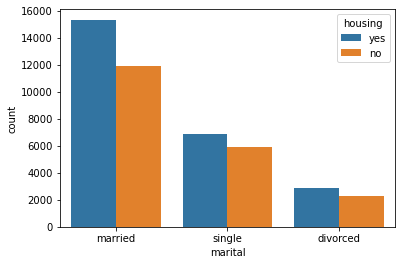

In [17]:
sns.countplot(x="marital",data=data,hue="housing")

<AxesSubplot:xlabel='marital', ylabel='count'>

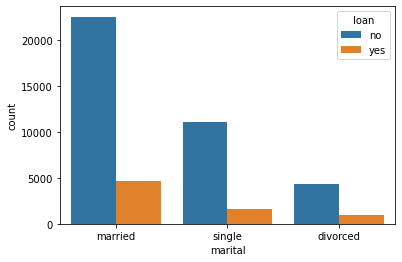

In [18]:
sns.countplot(x="marital",data=data,hue="loan")

<AxesSubplot:xlabel='marital', ylabel='count'>

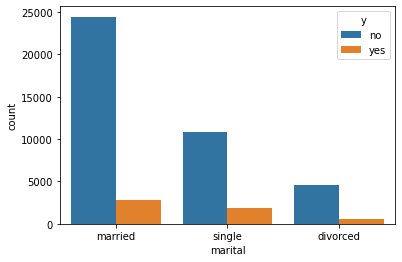

In [19]:
sns.countplot(x="marital",data=data,hue="y")

<AxesSubplot:xlabel='education', ylabel='count'>

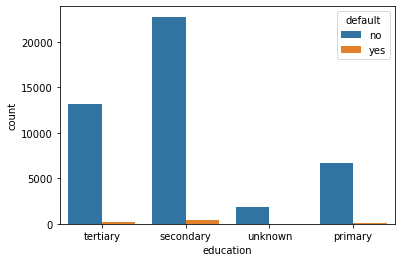

In [20]:
sns.countplot(x="education",data=data,hue="default")

<AxesSubplot:xlabel='education', ylabel='count'>

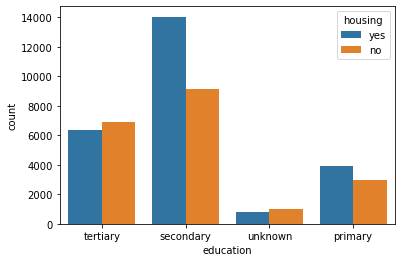

In [21]:
sns.countplot(x="education",data=data,hue="housing")

<AxesSubplot:xlabel='education', ylabel='count'>

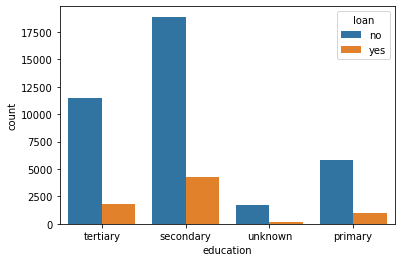

In [22]:
sns.countplot(x="education",data=data,hue="loan")

<AxesSubplot:xlabel='education', ylabel='count'>

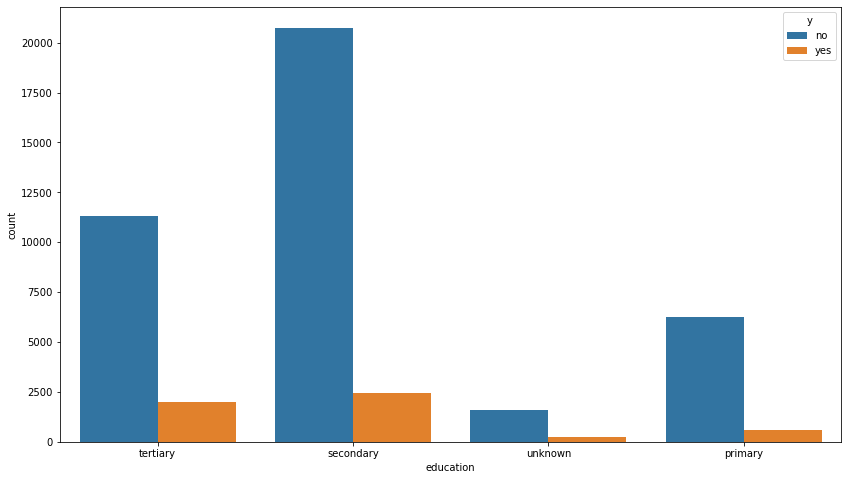

In [23]:
plt.figure(figsize=(14,8))
sns.countplot(x="education",data=data,hue="y")

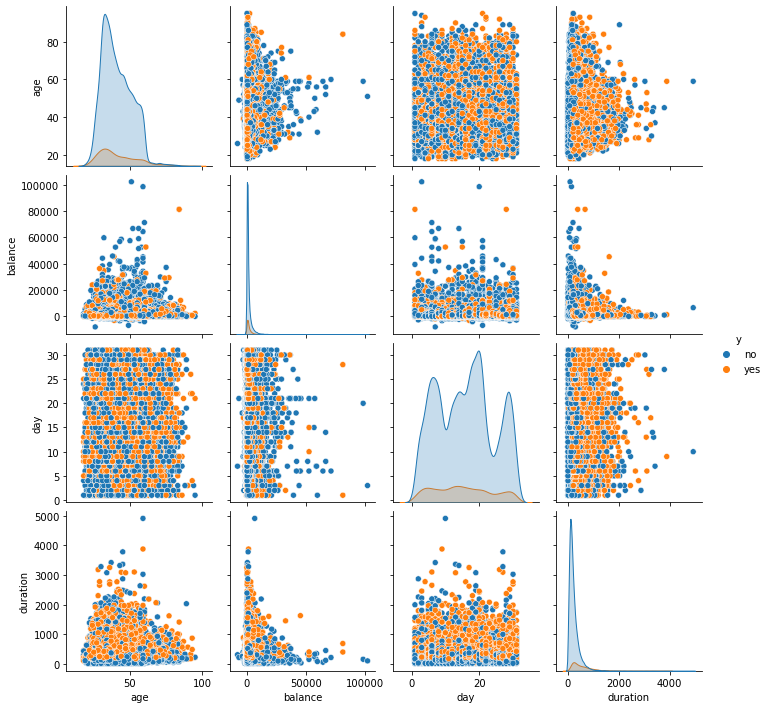

In [24]:
sns.pairplot(data=data,hue="y",vars=['age','balance','day','duration'])

<AxesSubplot:>

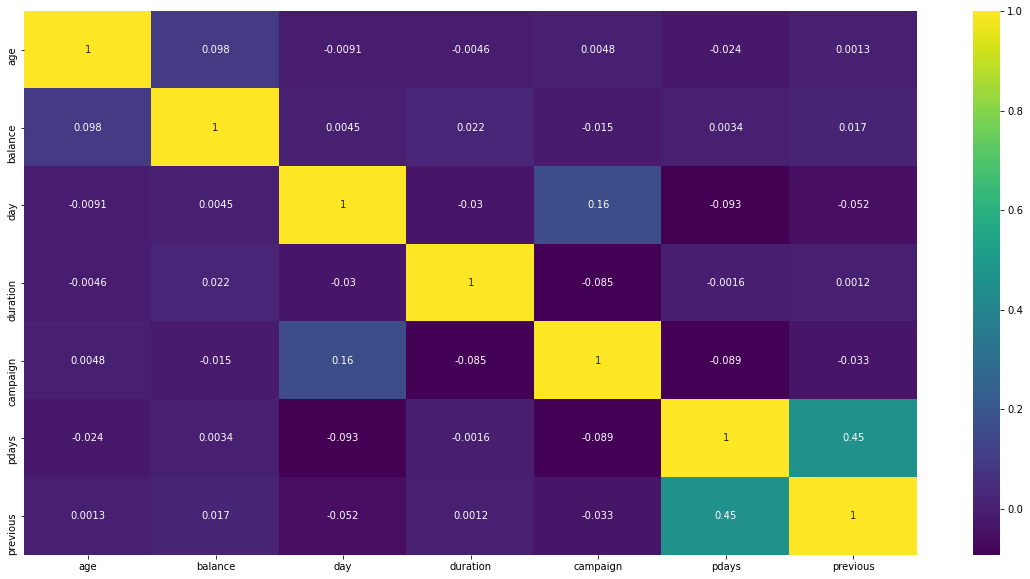

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data=data.corr(), annot=True, cmap='viridis')

<AxesSubplot:xlabel='y', ylabel='age'>

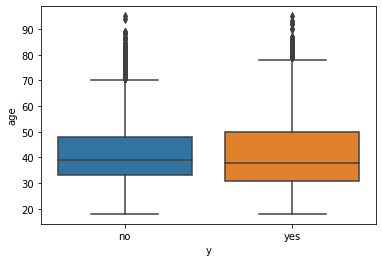

In [26]:
sns.boxplot(x="y",y="age",data=data)

<AxesSubplot:xlabel='y', ylabel='balance'>

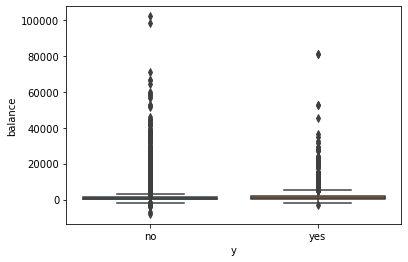

In [27]:
sns.boxplot(x="y",y="balance",data=data)

<AxesSubplot:xlabel='y', ylabel='duration'>

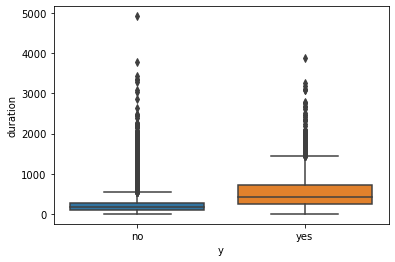

In [28]:
sns.boxplot(x="y",y="duration",data=data)

<AxesSubplot:ylabel='Frequency'>

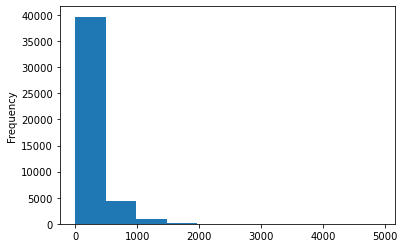

In [29]:
data['duration'].plot.hist()

In [30]:
from sklearn.preprocessing import PowerTransformer
b = data.drop(['job','marital','education','default','campaign','housing','loan','contact','month','previous','poutcome','y'],axis=1)
b

,age,balance,day,duration,pdays
0,58,2143,5,261,-1
1,44,29,5,151,-1
2,33,2,5,76,-1
3,47,1506,5,92,-1
4,33,1,5,198,-1
...,...,...,...,...,...
45206,51,825,17,977,-1
45207,71,1729,17,456,-1
45208,72,5715,17,1127,184
45209,57,668,17,508,-1


In [31]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson = pt.fit(b)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(b)
df_ptdata = pd.DataFrame(data=skl_yeojohnson, columns=['Age','Balance','Day','Duration','Pdays'])
df_ptdata.head()

,Age,Balance,Day,Duration,Pdays
0,1.473637,0.414773,-1.351873,0.386077,-0.472533
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533


<AxesSubplot:ylabel='Density'>

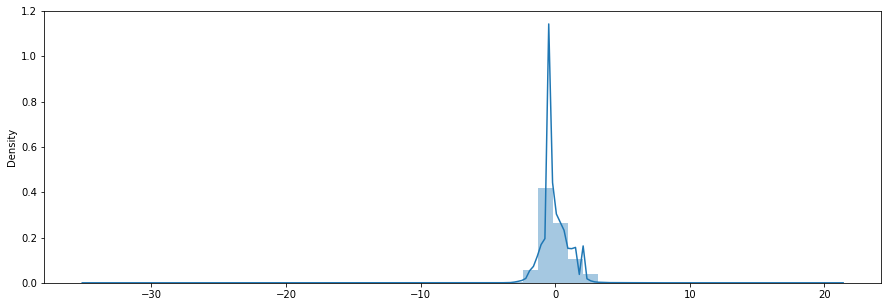

In [32]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,5))
sns.distplot(df_ptdata)

<AxesSubplot:ylabel='Density'>

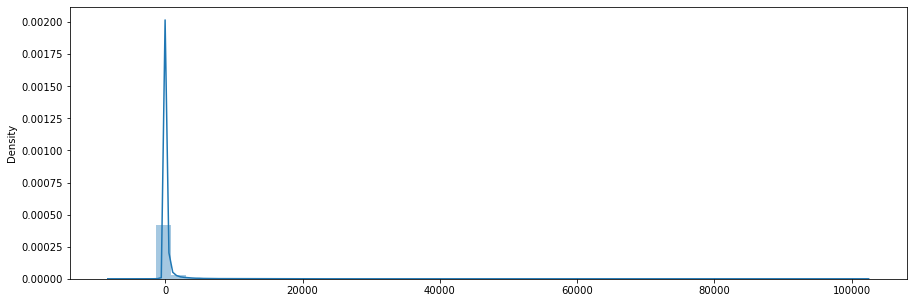

In [33]:
plt.figure(figsize=(15,5))
sns.distplot(b)

In [34]:
DATA = pd.concat([df_ptdata,data],axis=1)

In [35]:
DATA

,Age,Balance,Day,Duration,Pdays,age,job,marital,education,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.473637,0.414773,-1.351873,0.386077,-0.472533,58,management,married,tertiary,no,...,no,unknown,5,may,261,1,-1,0,unknown,no
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533,44,technician,single,secondary,no,...,no,unknown,5,may,151,1,-1,0,unknown,no
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533,33,entrepreneur,married,secondary,no,...,yes,unknown,5,may,76,1,-1,0,unknown,no
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533,47,blue-collar,married,unknown,no,...,no,unknown,5,may,92,1,-1,0,unknown,no
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533,33,unknown,single,unknown,no,...,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.993503,-0.052398,0.220403,2.057767,-0.472533,51,technician,married,tertiary,no,...,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,2.207438,0.275122,0.220403,1.056254,-0.472533,71,retired,divorced,primary,no,...,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,2.257237,1.495765,0.220403,2.257271,2.122381,72,retired,married,secondary,no,...,no,cellular,17,nov,1127,5,184,3,success,yes
45209,1.409327,-0.114235,0.220403,1.191963,-0.472533,57,blue-collar,married,secondary,no,...,no,telephone,17,nov,508,4,-1,0,unknown,no


In [36]:
c = DATA.drop(['age','balance','day','duration','pdays'],axis=1)
c

,Age,Balance,Day,Duration,Pdays,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,y
0,1.473637,0.414773,-1.351873,0.386077,-0.472533,management,married,tertiary,no,yes,no,unknown,may,1,0,unknown,no
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533,technician,single,secondary,no,yes,no,unknown,may,1,0,unknown,no
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533,entrepreneur,married,secondary,no,yes,yes,unknown,may,1,0,unknown,no
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533,blue-collar,married,unknown,no,yes,no,unknown,may,1,0,unknown,no
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533,unknown,single,unknown,no,no,no,unknown,may,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.993503,-0.052398,0.220403,2.057767,-0.472533,technician,married,tertiary,no,no,no,cellular,nov,3,0,unknown,yes
45207,2.207438,0.275122,0.220403,1.056254,-0.472533,retired,divorced,primary,no,no,no,cellular,nov,2,0,unknown,yes
45208,2.257237,1.495765,0.220403,2.257271,2.122381,retired,married,secondary,no,no,no,cellular,nov,5,3,success,yes
45209,1.409327,-0.114235,0.220403,1.191963,-0.472533,blue-collar,married,secondary,no,no,no,telephone,nov,4,0,unknown,no


In [37]:
label_encoder = preprocessing.LabelEncoder()

In [38]:
data['Job']= label_encoder.fit_transform(data['job'])

In [39]:
data['Marital']= label_encoder.fit_transform(data['marital'])

In [40]:
data['Education']= label_encoder.fit_transform(data['education'])

In [41]:
data['Month']= label_encoder.fit_transform(data['month'])

In [42]:
data['y1']= label_encoder.fit_transform(data['y'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,Job,Marital,Education,Month,y1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,4,1,2,8,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,9,2,1,8,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,2,1,1,8,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,1,1,3,8,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,11,2,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,3,-1,0,unknown,yes,9,1,2,9,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,2,-1,0,unknown,yes,5,0,0,9,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,5,184,3,success,yes,5,1,1,9,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,4,-1,0,unknown,no,1,1,1,9,0


In [43]:
label_data=data.drop(['age','job','marital','education','default','balance','housing','loan','contact','day','duration','campaign','pdays','previous','poutcome','y','month'],axis=1)
label_data

,Job,Marital,Education,Month,y1
0,4,1,2,8,0
1,9,2,1,8,0
2,2,1,1,8,0
3,1,1,3,8,0
4,11,2,3,8,0
...,...,...,...,...,...
45206,9,1,2,9,1
45207,5,0,0,9,1
45208,5,1,1,9,1
45209,1,1,1,9,0


In [44]:
Dummy_DATA = pd.get_dummies(c,columns=['default','housing','loan','contact','poutcome'])
Dummy_DATA

,Age,Balance,Day,Duration,Pdays,job,marital,education,month,campaign,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.473637,0.414773,-1.351873,0.386077,-0.472533,management,married,tertiary,may,1,...,1,1,0,0,0,1,0,0,0,1
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533,technician,single,secondary,may,1,...,1,1,0,0,0,1,0,0,0,1
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533,entrepreneur,married,secondary,may,1,...,1,0,1,0,0,1,0,0,0,1
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533,blue-collar,married,unknown,may,1,...,1,1,0,0,0,1,0,0,0,1
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533,unknown,single,unknown,may,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.993503,-0.052398,0.220403,2.057767,-0.472533,technician,married,tertiary,nov,3,...,0,1,0,1,0,0,0,0,0,1
45207,2.207438,0.275122,0.220403,1.056254,-0.472533,retired,divorced,primary,nov,2,...,0,1,0,1,0,0,0,0,0,1
45208,2.257237,1.495765,0.220403,2.257271,2.122381,retired,married,secondary,nov,5,...,0,1,0,1,0,0,0,0,1,0
45209,1.409327,-0.114235,0.220403,1.191963,-0.472533,blue-collar,married,secondary,nov,4,...,0,1,0,0,1,0,0,0,0,1


In [45]:
Dummy_Variables = Dummy_DATA.drop(['Age','Balance','Day','Duration','Pdays','job','marital','education','month','campaign','y','previous'],axis=1)
Dummy_Variables

,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,1,1,0,0,0,1,0,0,0,1
1,1,0,0,1,1,0,0,0,1,0,0,0,1
2,1,0,0,1,0,1,0,0,1,0,0,0,1
3,1,0,0,1,1,0,0,0,1,0,0,0,1
4,1,0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,1,0,1,0,1,0,0,0,0,0,1
45207,1,0,1,0,1,0,1,0,0,0,0,0,1
45208,1,0,1,0,1,0,1,0,0,0,0,1,0
45209,1,0,1,0,1,0,0,1,0,0,0,0,1


In [46]:
Nondummy_DATA = Dummy_DATA.drop(['default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes','contact_cellular','contact_telephone','contact_unknown','poutcome_failure','poutcome_other','poutcome_success','poutcome_unknown'],axis=1)
Nondummy_DATA

,Age,Balance,Day,Duration,Pdays,job,marital,education,month,campaign,previous,y
0,1.473637,0.414773,-1.351873,0.386077,-0.472533,management,married,tertiary,may,1,0,no
1,0.429379,-0.410774,-1.351873,-0.223033,-0.472533,technician,single,secondary,may,1,0,no
2,-0.709873,-0.431122,-1.351873,-0.923854,-0.472533,entrepreneur,married,secondary,may,1,0,no
3,0.683128,0.197685,-1.351873,-0.735678,-0.472533,blue-collar,married,unknown,may,1,0,no
4,-0.709873,-0.432119,-1.351873,0.072812,-0.472533,unknown,single,unknown,may,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.993503,-0.052398,0.220403,2.057767,-0.472533,technician,married,tertiary,nov,3,0,yes
45207,2.207438,0.275122,0.220403,1.056254,-0.472533,retired,divorced,primary,nov,2,0,yes
45208,2.257237,1.495765,0.220403,2.257271,2.122381,retired,married,secondary,nov,5,3,yes
45209,1.409327,-0.114235,0.220403,1.191963,-0.472533,blue-collar,married,secondary,nov,4,0,no


In [47]:
final_data=pd.concat([Dummy_Variables,Nondummy_DATA,label_data],axis=1)
final_data

,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,...,education,month,campaign,previous,y,Job,Marital,Education,Month,y1
0,1,0,0,1,1,0,0,0,1,0,...,tertiary,may,1,0,no,4,1,2,8,0
1,1,0,0,1,1,0,0,0,1,0,...,secondary,may,1,0,no,9,2,1,8,0
2,1,0,0,1,0,1,0,0,1,0,...,secondary,may,1,0,no,2,1,1,8,0
3,1,0,0,1,1,0,0,0,1,0,...,unknown,may,1,0,no,1,1,3,8,0
4,1,0,1,0,1,0,0,0,1,0,...,unknown,may,1,0,no,11,2,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,1,0,1,0,1,0,0,0,...,tertiary,nov,3,0,yes,9,1,2,9,1
45207,1,0,1,0,1,0,1,0,0,0,...,primary,nov,2,0,yes,5,0,0,9,1
45208,1,0,1,0,1,0,1,0,0,0,...,secondary,nov,5,3,yes,5,1,1,9,1
45209,1,0,1,0,1,0,0,1,0,0,...,secondary,nov,4,0,no,1,1,1,9,0


In [48]:
final_data.shape

(45211, 30)

In [49]:
final_cleaned_data=final_data.drop(['job', 'marital', 'education', 'month','y'],axis=1)
final_cleaned_data.shape

(45211, 25)

In [50]:
final_cleaned_data.columns

Index(['default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'Age', 'Balance', 'Day', 'Duration', 'Pdays',
       'campaign', 'previous', 'Job', 'Marital', 'Education', 'Month', 'y1'],
      dtype='object')

In [51]:
X = final_cleaned_data.iloc[:,:-1]

In [52]:
Y = final_cleaned_data.iloc[:,-1]

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [54]:
classifier = LogisticRegression()

In [55]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [56]:
classifier.coef_

array([[-0.36731481, -0.63420774, -0.05939819, -0.94212435, -0.22021692,
        -0.78130562,  0.04148636,  0.12887497, -1.17188388, -0.92873488,
        -0.6600476 ,  1.38380204, -0.79654211, -0.03513508,  0.07639   ,
        -0.03409926,  1.50171696,  0.17863972, -0.08128813,  0.0059457 ,
         0.00374098,  0.11465036,  0.15658391,  0.02552101]])

In [57]:
classifier.predict_proba(X_test)

array([[0.98569758, 0.01430242],
       [0.98979162, 0.01020838],
       [0.93094018, 0.06905982],
       ...,
       [0.98696877, 0.01303123],
       [0.99439584, 0.00560416],
       [0.97446967, 0.02553033]])

In [58]:
y_pred=classifier.predict(X)
final_cleaned_data["y_pred"]=y_pred
final_cleaned_data

,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,...,Duration,Pdays,campaign,previous,Job,Marital,Education,Month,y1,y_pred
0,1,0,0,1,1,0,0,0,1,0,...,0.386077,-0.472533,1,0,4,1,2,8,0,0
1,1,0,0,1,1,0,0,0,1,0,...,-0.223033,-0.472533,1,0,9,2,1,8,0,0
2,1,0,0,1,0,1,0,0,1,0,...,-0.923854,-0.472533,1,0,2,1,1,8,0,0
3,1,0,0,1,1,0,0,0,1,0,...,-0.735678,-0.472533,1,0,1,1,3,8,0,0
4,1,0,1,0,1,0,0,0,1,0,...,0.072812,-0.472533,1,0,11,2,3,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,1,0,1,0,1,0,0,0,...,2.057767,-0.472533,3,0,9,1,2,9,1,1
45207,1,0,1,0,1,0,1,0,0,0,...,1.056254,-0.472533,2,0,5,0,0,9,1,0
45208,1,0,1,0,1,0,1,0,0,0,...,2.257271,2.122381,5,3,5,1,1,9,1,1
45209,1,0,1,0,1,0,0,1,0,0,...,1.191963,-0.472533,4,0,1,1,1,9,0,0


In [59]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))

In [60]:
new_df = pd.concat([final_cleaned_data,y_prob],axis=1)
new_df

,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,...,campaign,previous,Job,Marital,Education,Month,y1,y_pred,0,1
0,1,0,0,1,1,0,0,0,1,0,...,1,0,4,1,2,8,0,0,0.970696,0.029304
1,1,0,0,1,1,0,0,0,1,0,...,1,0,9,2,1,8,0,0,0.988622,0.011378
2,1,0,0,1,0,1,0,0,1,0,...,1,0,2,1,1,8,0,0,0.997935,0.002065
3,1,0,0,1,1,0,0,0,1,0,...,1,0,1,1,3,8,0,0,0.993493,0.006507
4,1,0,1,0,1,0,0,0,1,0,...,1,0,11,2,3,8,0,0,0.941506,0.058494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,1,0,1,0,1,0,0,0,...,3,0,9,1,2,9,1,1,0.285889,0.714111
45207,1,0,1,0,1,0,1,0,0,0,...,2,0,5,0,0,9,1,0,0.724657,0.275343
45208,1,0,1,0,1,0,1,0,0,0,...,5,3,5,1,1,9,1,1,0.026173,0.973827
45209,1,0,1,0,1,0,0,1,0,0,...,4,0,1,1,1,9,0,0,0.642103,0.357897


In [61]:
pd.crosstab(Y,y_pred)

col_0,0,1
y1,,
0,38963,959
1,3565,1724


In [62]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.64      0.33      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.89     45211



In [63]:
logit_roc_score = roc_auc_score(Y,classifier.predict(X))

In [64]:
logit_roc_score

0.6509688480360488

In [65]:
logit = sm.Logit(Y,X)

In [66]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.241593
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     y1   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45189
Method:                           MLE   Df Model:                           21
Date:                Mon, 29 Mar 2021   Pseudo R-squ.:                  0.3305
Time:                        00:50:23   Log-Likelihood:                -10923.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
default_no          -40.3590        nan        nan        nan         nan         nan
default_yes         -40.5434        nan        nan        nan         nan         nan
housing_no           40.1334   7.24e+05   5.54e-05      1.000   -1.42e+06    1.42e+06
housing_yes          39.2604    8.2e+05   4.79e-05      1.000   -1.61e+06    1.61e+06
loan_no              -1.5576   1.58e+06  -9.87e-07      1.000   -3.09e+06    3.09e+06
loan_yes             -2.1314   1.81e+06  -1.18e-06      1.000   -3.55e+06    3.55e+06
contact_cellular     -0.3007        nan        nan        nan         nan         nan
contact_telephone    -0.2714        nan        nan        nan         nan         nan
contact_unknown      -1.4710        nan        nan        nan         nan         nan
poutcome_failure     -1.3789   1.49e+06  -9.24e-07      1.000   -2.92e+06    2.92e+06
poutcome_other       -1.1210   1.49e+06  -7.51e-07      1.000   -2.92e+06    2.92e+06
poutcome_success      0.9838   1.49e+06   6.59e-07      1.000   -2.92e+06    2.92e+06
poutcome_unknown     -0.2730   1.49e+06  -1.83e-07      1.000   -2.92e+06    2.92e+06
Age                  -0.0441      0.019     -2.265      0.023      -0.082      -0.006
Balance               0.0855      0.017      4.971      0.000       0.052       0.119
Day                  -0.0442      0.018     -2.476      0.013      -0.079      -0.009
Duration              1.4964      0.022     68.137      0.000       1.453       1.539
Pdays                 0.5388      0.319      1.689      0.091      -0.086       1.164
campaign             -0.0849      0.010     -8.517      0.000      -0.104      -0.065
previous              0.0086      0.006      1.331      0.183      -0.004       0.021
Job                   0.0052      0.006      0.936      0.349      -0.006       0.016
Marital               0.1205      0.033      3.677      0.000       0.056       0.185
Education             0.1750      0.024      7.224      0.000       0.128       0.223
Month                 0.0278      0.006      4.761      0.000       0.016       0.039
=====================================================================================
"""

In [67]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [70]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Subscribe", "Not_Subscribe"]
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.combine import SMOTETomek

In [71]:
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,Y)

In [72]:
X_res.shape,y_res.shape

((10578, 24), (10578,))

In [73]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 39922, 1: 5289})
Resampled dataset shape Counter({0: 5289, 1: 5289})


In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,random_state = 42)

In [75]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
classifier.coef_

array([[-1.53599724,  1.89642106,  0.51067191, -0.15024809, -0.51597405,
         0.87639788, -0.44051615,  1.85892478, -1.0579848 , -1.1411045 ,
         1.05885483,  0.58502486, -0.14235137,  0.04106008,  0.66257633,
        -0.06887192,  1.00756116,  0.98702829,  0.19387226,  0.46220342,
         0.06295518,  0.01499168,  0.15189882,  0.0586154 ]])

In [76]:
classifier.predict_proba(X_test)

array([[0.17583084, 0.82416916],
       [0.39086225, 0.60913775],
       [0.01657645, 0.98342355],
       ...,
       [0.42386966, 0.57613034],
       [0.01500844, 0.98499156],
       [0.31783596, 0.68216404]])

In [77]:
y_pred=classifier.predict(X)
final_cleaned_data["y_pred"]=y_pred
final_cleaned_data

,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,...,Duration,Pdays,campaign,previous,Job,Marital,Education,Month,y1,y_pred
0,1,0,0,1,1,0,0,0,1,0,...,0.386077,-0.472533,1,0,4,1,2,8,0,0
1,1,0,0,1,1,0,0,0,1,0,...,-0.223033,-0.472533,1,0,9,2,1,8,0,0
2,1,0,0,1,0,1,0,0,1,0,...,-0.923854,-0.472533,1,0,2,1,1,8,0,0
3,1,0,0,1,1,0,0,0,1,0,...,-0.735678,-0.472533,1,0,1,1,3,8,0,0
4,1,0,1,0,1,0,0,0,1,0,...,0.072812,-0.472533,1,0,11,2,3,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,1,0,1,0,1,0,0,0,...,2.057767,-0.472533,3,0,9,1,2,9,1,1
45207,1,0,1,0,1,0,1,0,0,0,...,1.056254,-0.472533,2,0,5,0,0,9,1,1
45208,1,0,1,0,1,0,1,0,0,0,...,2.257271,2.122381,5,3,5,1,1,9,1,1
45209,1,0,1,0,1,0,0,1,0,0,...,1.191963,-0.472533,4,0,1,1,1,9,0,1


In [78]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))

In [79]:
new_df = pd.concat([final_cleaned_data,y_prob],axis=1)
new_df

,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,...,campaign,previous,Job,Marital,Education,Month,y1,y_pred,0,1
0,1,0,0,1,1,0,0,0,1,0,...,1,0,4,1,2,8,0,0,0.804688,0.195312
1,1,0,0,1,1,0,0,0,1,0,...,1,0,9,2,1,8,0,0,0.919942,0.080058
2,1,0,0,1,0,1,0,0,1,0,...,1,0,2,1,1,8,0,0,0.906468,0.093532
3,1,0,0,1,1,0,0,0,1,0,...,1,0,1,1,3,8,0,0,0.940439,0.059561
4,1,0,1,0,1,0,0,0,1,0,...,1,0,11,2,3,8,0,0,0.752832,0.247168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,1,0,1,0,1,0,0,0,...,3,0,9,1,2,9,1,1,0.133488,0.866512
45207,1,0,1,0,1,0,1,0,0,0,...,2,0,5,0,0,9,1,1,0.410052,0.589948
45208,1,0,1,0,1,0,1,0,0,0,...,5,3,5,1,1,9,1,1,0.000406,0.999594
45209,1,0,1,0,1,0,0,1,0,0,...,4,0,1,1,1,9,0,1,0.056680,0.943320


In [80]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     39922
           1       0.23      0.71      0.35      5289

    accuracy                           0.69     45211
   macro avg       0.59      0.70      0.57     45211
weighted avg       0.86      0.69      0.74     45211



In [81]:
logit_roc_score = roc_auc_score(Y,classifier.predict(X))

In [82]:
logit_roc_score

0.6988792069663468

In [83]:
logit = sm.Logit(Y,X)

In [84]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.241593
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     y1   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45189
Method:                           MLE   Df Model:                           21
Date:                Mon, 29 Mar 2021   Pseudo R-squ.:                  0.3305
Time:                        00:54:55   Log-Likelihood:                -10923.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
default_no          -40.3590        nan        nan        nan         nan         nan
default_yes         -40.5434        nan        nan        nan         nan         nan
housing_no           40.1334   7.24e+05   5.54e-05      1.000   -1.42e+06    1.42e+06
housing_yes          39.2604    8.2e+05   4.79e-05      1.000   -1.61e+06    1.61e+06
loan_no              -1.5576   1.58e+06  -9.87e-07      1.000   -3.09e+06    3.09e+06
loan_yes             -2.1314   1.81e+06  -1.18e-06      1.000   -3.55e+06    3.55e+06
contact_cellular     -0.3007        nan        nan        nan         nan         nan
contact_telephone    -0.2714        nan        nan        nan         nan         nan
contact_unknown      -1.4710        nan        nan        nan         nan         nan
poutcome_failure     -1.3789   1.49e+06  -9.24e-07      1.000   -2.92e+06    2.92e+06
poutcome_other       -1.1210   1.49e+06  -7.51e-07      1.000   -2.92e+06    2.92e+06
poutcome_success      0.9838   1.49e+06   6.59e-07      1.000   -2.92e+06    2.92e+06
poutcome_unknown     -0.2730   1.49e+06  -1.83e-07      1.000   -2.92e+06    2.92e+06
Age                  -0.0441      0.019     -2.265      0.023      -0.082      -0.006
Balance               0.0855      0.017      4.971      0.000       0.052       0.119
Day                  -0.0442      0.018     -2.476      0.013      -0.079      -0.009
Duration              1.4964      0.022     68.137      0.000       1.453       1.539
Pdays                 0.5388      0.319      1.689      0.091      -0.086       1.164
campaign             -0.0849      0.010     -8.517      0.000      -0.104      -0.065
previous              0.0086      0.006      1.331      0.183      -0.004       0.021
Job                   0.0052      0.006      0.936      0.349      -0.006       0.016
Marital               0.1205      0.033      3.677      0.000       0.056       0.185
Education             0.1750      0.024      7.224      0.000       0.128       0.223
Month                 0.0278      0.006      4.761      0.000       0.016       0.039
=====================================================================================
"""

In [85]:
smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_resample(X,Y)

In [86]:
X_res.shape,y_res.shape

((79712, 24), (79712,))

In [87]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 39922, 1: 5289})
Resampled dataset shape Counter({0: 39856, 1: 39856})


In [88]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,random_state = 42)

In [90]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
classifier.coef_

array([[ 2.64815220e-01, -1.38091932e-01, -4.19103227e+00,
        -5.51510526e+00, -3.48517772e+00, -5.06662806e+00,
        -3.90009819e+00, -4.39524011e+00, -5.53234247e+00,
        -5.02154096e+00, -4.86476829e+00, -2.57476356e+00,
         4.71397833e+00, -1.98284722e-01,  8.92404983e-02,
        -5.71866492e-02,  1.83598261e+00,  3.69478294e+00,
        -2.20891318e-01,  2.35775594e-03, -1.10405348e-02,
        -1.85546444e-01, -9.54063428e-03,  2.07614542e-02]])

In [91]:
classifier.predict_proba(X_test)

array([[0.09982993, 0.90017007],
       [0.82216503, 0.17783497],
       [0.81606122, 0.18393878],
       ...,
       [0.00191786, 0.99808214],
       [0.98402911, 0.01597089],
       [0.5833275 , 0.4166725 ]])

In [92]:
y_pred=classifier.predict(X)
final_cleaned_data["y_pred"]=y_pred
final_cleaned_data

,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,...,Duration,Pdays,campaign,previous,Job,Marital,Education,Month,y1,y_pred
0,1,0,0,1,1,0,0,0,1,0,...,0.386077,-0.472533,1,0,4,1,2,8,0,0
1,1,0,0,1,1,0,0,0,1,0,...,-0.223033,-0.472533,1,0,9,2,1,8,0,0
2,1,0,0,1,0,1,0,0,1,0,...,-0.923854,-0.472533,1,0,2,1,1,8,0,0
3,1,0,0,1,1,0,0,0,1,0,...,-0.735678,-0.472533,1,0,1,1,3,8,0,0
4,1,0,1,0,1,0,0,0,1,0,...,0.072812,-0.472533,1,0,11,2,3,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,1,0,1,0,1,0,0,0,...,2.057767,-0.472533,3,0,9,1,2,9,1,1
45207,1,0,1,0,1,0,1,0,0,0,...,1.056254,-0.472533,2,0,5,0,0,9,1,1
45208,1,0,1,0,1,0,1,0,0,0,...,2.257271,2.122381,5,3,5,1,1,9,1,1
45209,1,0,1,0,1,0,0,1,0,0,...,1.191963,-0.472533,4,0,1,1,1,9,0,1


In [93]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90     39922
           1       0.40      0.72      0.51      5289

    accuracy                           0.84     45211
   macro avg       0.68      0.79      0.71     45211
weighted avg       0.89      0.84      0.86     45211



In [94]:
logit_roc_score = roc_auc_score(Y,classifier.predict(X))

In [95]:
logit_roc_score

0.7892605247466441

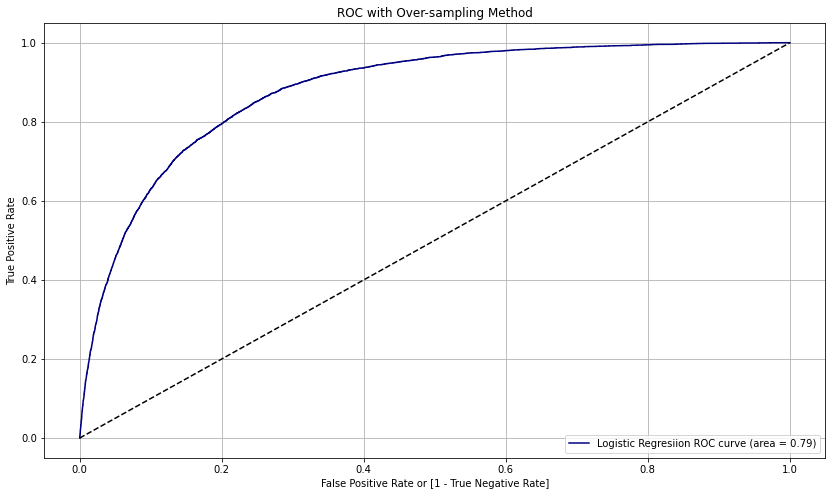

In [96]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
auc = roc_auc_score(Y, y_pred)
plt.plot(fpr, tpr, color='navy', label='Logistic Regresiion ROC curve (area = %0.2f)' %logit_roc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title("ROC with Over-sampling Method")
plt.legend(loc = "lower right")